In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
new=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
# print first 15 records
new.head(15)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


To determine: If an ad comes on social media, we have to predict weather the user viewing the ad will click and purchase the product or not
In purchase col 1---> User opens ad and purchases item
0---> User does not open ad and dosent purchase item

We are given a dataset , from this we have to create a model which will predict weather the user clicks ad and buys product or not.

In [ ]:
## Checking for null values
new.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# check datatype
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
new['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
# here 0-> Item not purchased after watching ad
# 1-> Item purchased after watching

In [ ]:
# Now for creation of prediction model we need to identify which is dependent
# and which are independent variable

# Y axis=Dependent=Purchased   -----------> to be predicted
# X axis=Independent =Age , salary   -----------> From which we have to predict

In [ ]:
X = new[['Age', 'EstimatedSalary']]
y = new['Purchased']

In [ ]:
## Splitting the dataset  into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42, )

# HERE
# test size=0.20  ----> use 20% data for testing and use 80% data for training
#  the random_state parameter is used to ensure that the same train-test split is 
#obtained every time the code is executed.
#In machine learning, random_state is a parameter that 
#is used to initialize the random number generator used
#by various algorithms. The random number generator is 
#used to shuffle the data, split the data into train and
#test sets, and initialize the weights of some algorithms,
#among other things.


In machine learning, it is often important to scale the features in the dataset before training a model. The reason for scaling is that many machine learning algorithms perform better when the features are on a similar scale.

In [ ]:
## Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)    

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm)   
ac = accuracy_score(y_test, y_pred)*100
print('Accuracy Score:')
print(ac)

Confusion Matrix: 
[[50  2]
 [ 9 19]]
Accuracy Score:
86.25


Confusion matrix tells following : 
eg: If Actual prediction id It will rain  and our model predicts it will rain then it is known as TP (True positive)

In [ ]:
## True positive, true negative, false positive & false negative
tp=cm[0][0]
tn=cm[1][1]
fp=cm[1][0]  
fn=cm[0][1]
total=tp+tn+fp+fn

In [ ]:
## Error Rate
error_rate=(fp+fn)/(total)
print('error rate: ')
print(error_rate)

error rate: 
0.1375


In [ ]:
## Classification Report
from sklearn.metrics import classification_report
print('                      classification report:')
print(classification_report(y_test,y_pred))

                      classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



<Axes: xlabel='Age', ylabel='Purchased'>

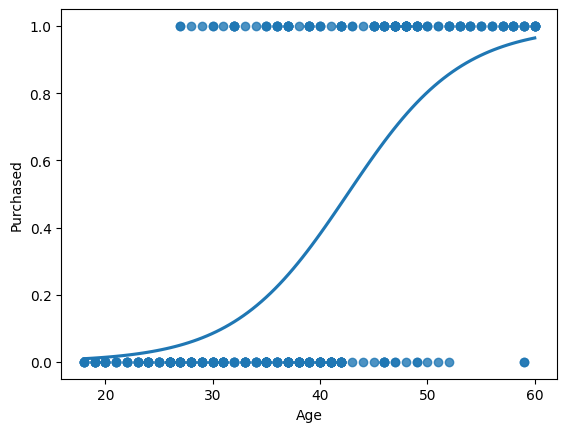

In [ ]:
sns.regplot(x=new["Age"],y=y,logistic=True, ci=None)